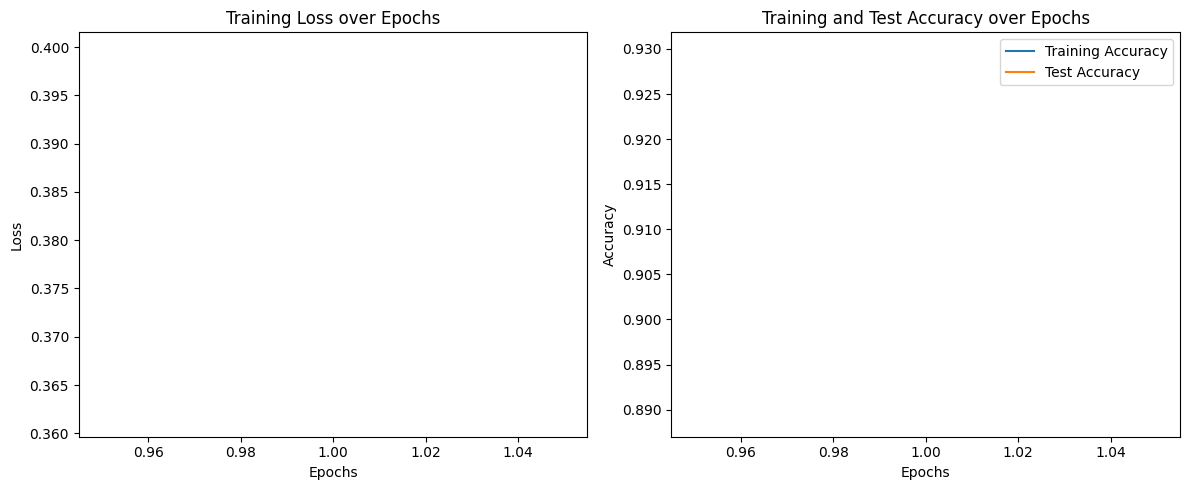

Epoch 1/10, Loss: 0.3806, Train Acc: 0.8890, Test Acc: 0.9298


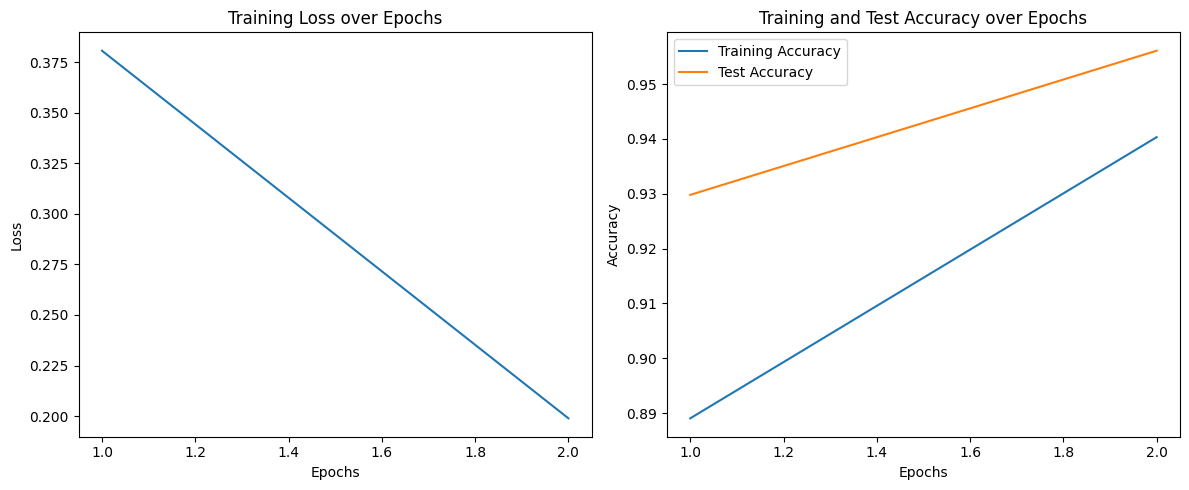

Epoch 2/10, Loss: 0.1989, Train Acc: 0.9403, Test Acc: 0.9561


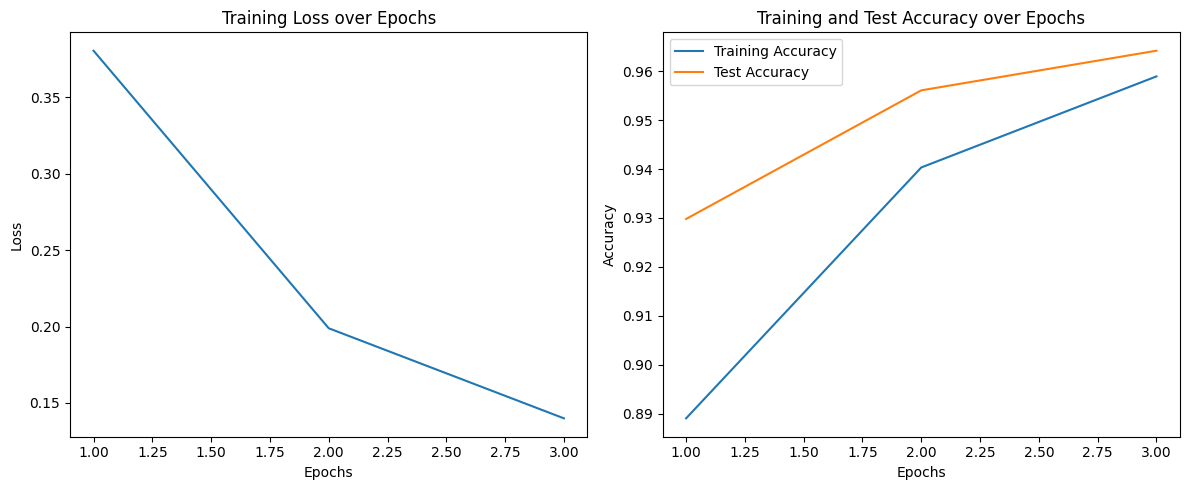

Epoch 3/10, Loss: 0.1399, Train Acc: 0.9589, Test Acc: 0.9642


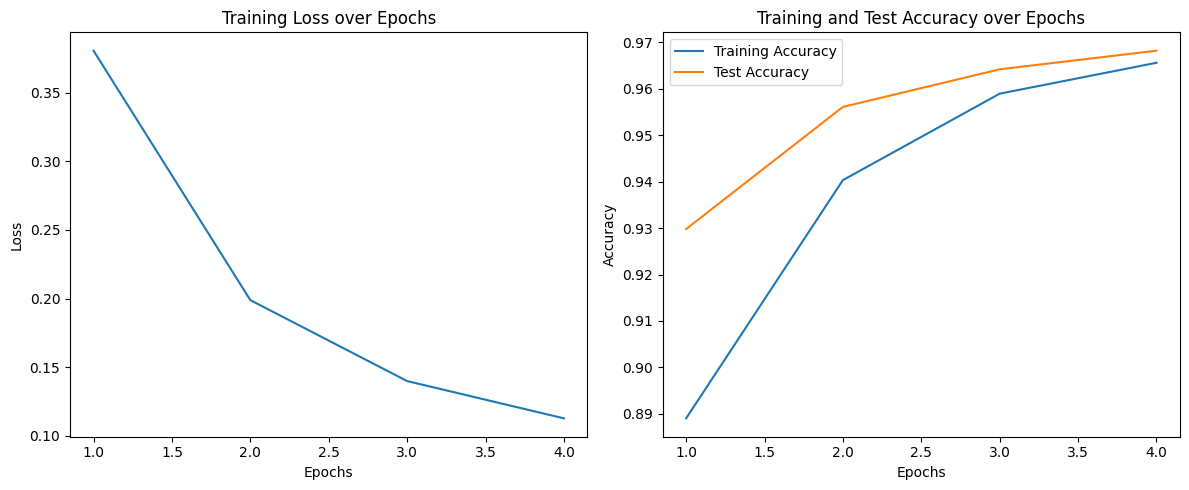

Epoch 4/10, Loss: 0.1128, Train Acc: 0.9656, Test Acc: 0.9682


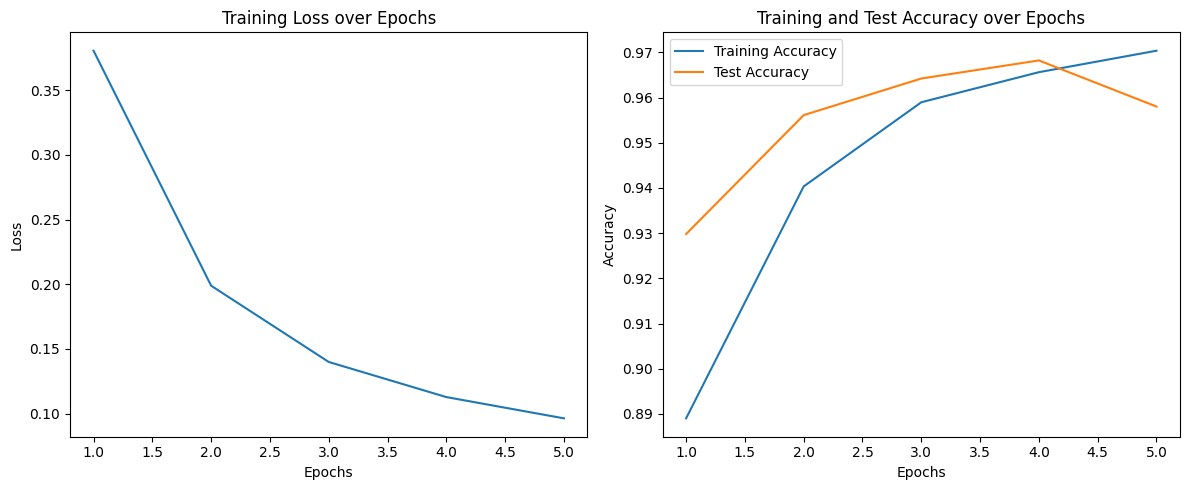

Epoch 5/10, Loss: 0.0963, Train Acc: 0.9704, Test Acc: 0.9580


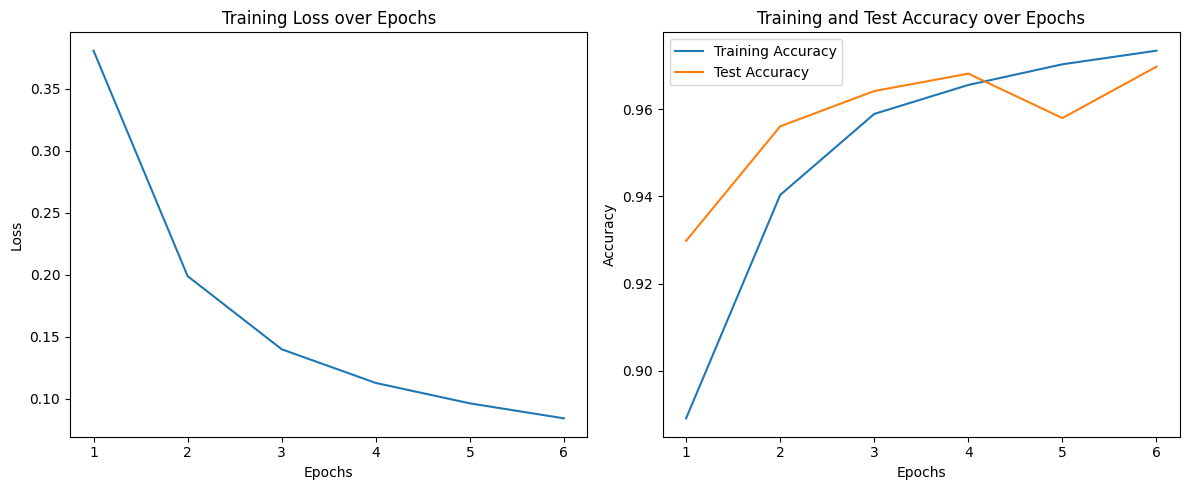

Epoch 6/10, Loss: 0.0842, Train Acc: 0.9735, Test Acc: 0.9698


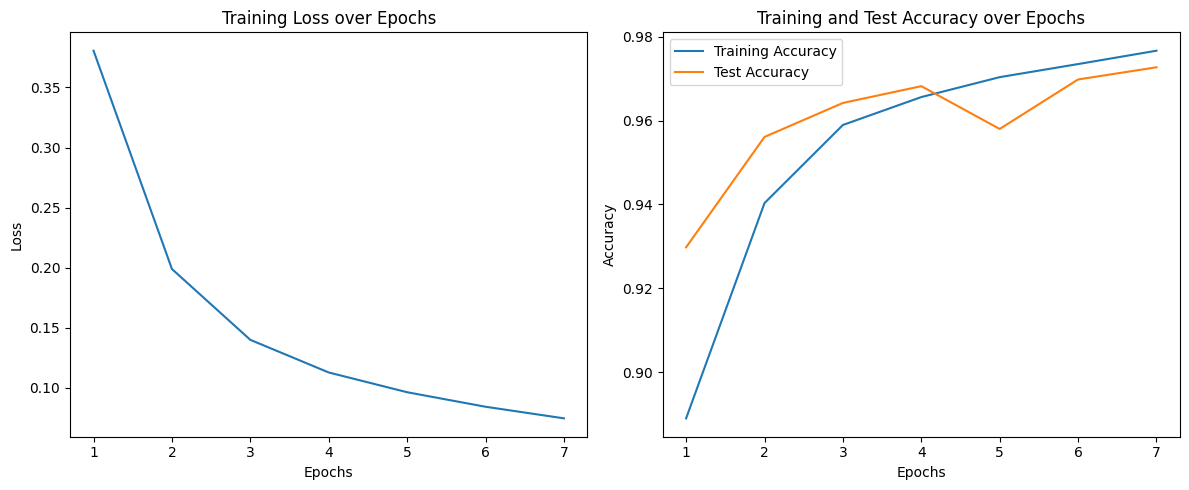

Epoch 7/10, Loss: 0.0746, Train Acc: 0.9767, Test Acc: 0.9727


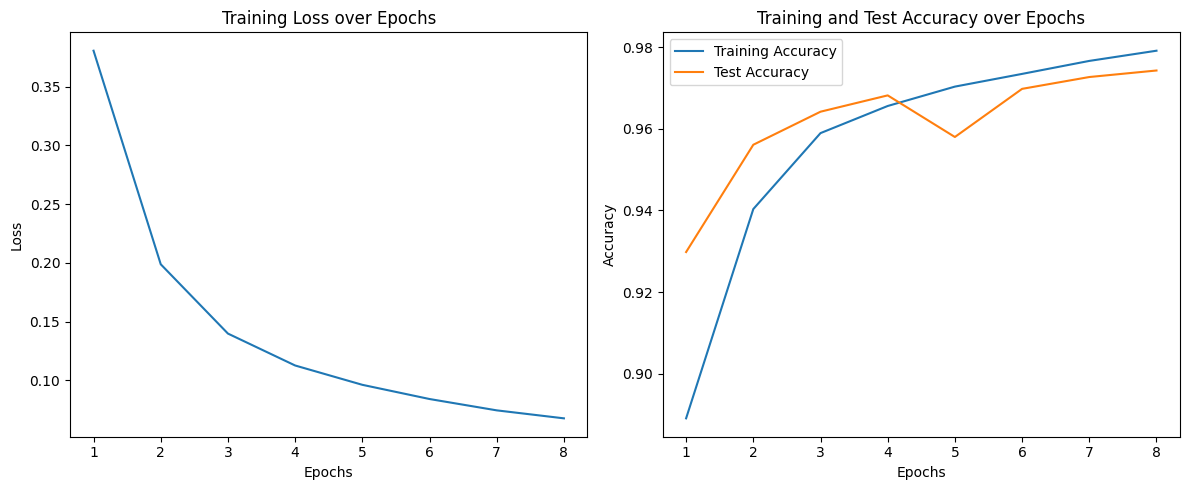

Epoch 8/10, Loss: 0.0678, Train Acc: 0.9791, Test Acc: 0.9743


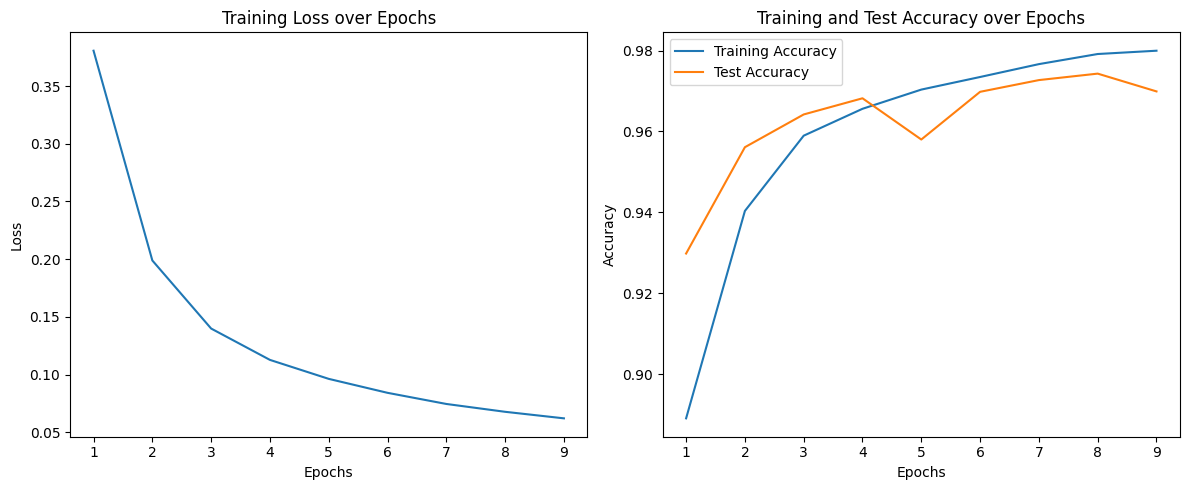

Epoch 9/10, Loss: 0.0621, Train Acc: 0.9800, Test Acc: 0.9699


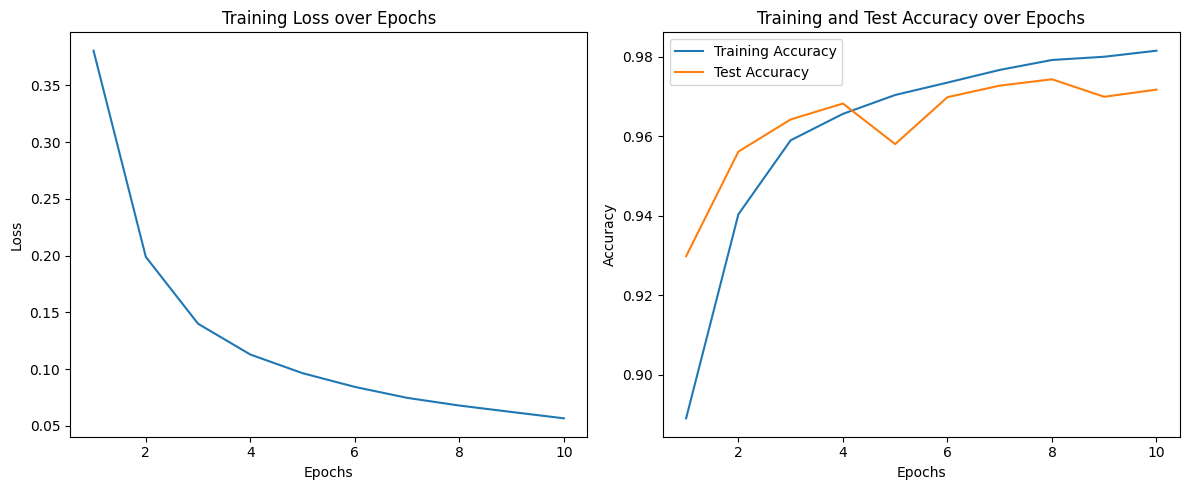

Epoch 10/10, Loss: 0.0565, Train Acc: 0.9815, Test Acc: 0.9717
Training complete!


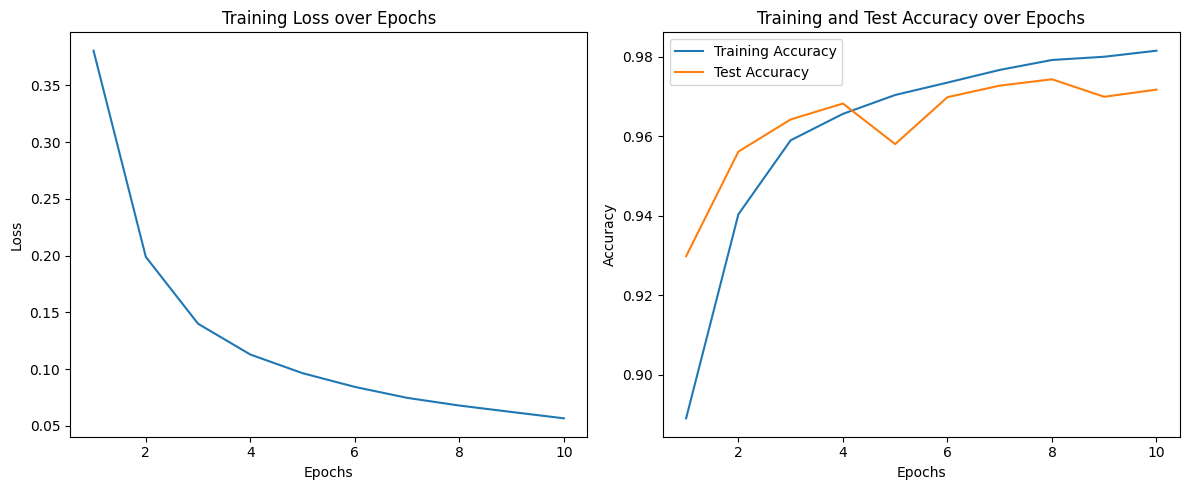

Final plot saved as 'training_progress.png'


In [1]:
import torch
from torchvision import datasets, transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import matplotlib.pyplot as plt

# Define the transform
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

# Load the MNIST dataset
trainset = datasets.MNIST(root='./data', train=True, download=True, transform=transform)
testset = datasets.MNIST(root='./data', train=False, download=True, transform=transform)

trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=False)

# Define the neural network
class SimpleNN(nn.Module):
    def __init__(self):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(28 * 28, 128)
        self.fc2 = nn.Linear(128, 10)
    
    def forward(self, x):
        x = x.view(-1, 28 * 28)
        x = F.relu(self.fc1(x))
        x = self.fc2(x)
        return F.log_softmax(x, dim=1)

# Initialize the model, optimizer, and loss function
model = SimpleNN()
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.NLLLoss()

# Function to plot the training progress
%matplotlib inline

def plot_progress(epochs, train_losses, train_accuracies, test_accuracies):
    plt.figure(figsize=(12, 5))
    
    plt.subplot(1, 2, 1)
    plt.plot(epochs, train_losses)
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title('Training Loss over Epochs')
    
    plt.subplot(1, 2, 2)
    plt.plot(epochs, train_accuracies, label='Training Accuracy')
    plt.plot(epochs, test_accuracies, label='Test Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title('Training and Test Accuracy over Epochs')
    plt.legend()
    
    plt.tight_layout()
    plt.show()

# Training the model with progress visualization
num_epochs = 10
epochs = []
train_losses = []
train_accuracies = []
test_accuracies = []

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_train = 0
    total_train = 0
    
    for images, labels in trainloader:
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total_train += labels.size(0)
        correct_train += (predicted == labels).sum().item()
    
    # Calculate training loss and accuracy
    epoch_loss = running_loss / len(trainloader)
    epoch_acc = correct_train / total_train
    
    # Calculate test accuracy
    model.eval()
    correct_test = 0
    total_test = 0
    with torch.no_grad():
        for images, labels in testloader:
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total_test += labels.size(0)
            correct_test += (predicted == labels).sum().item()
    
    test_acc = correct_test / total_test
    
    # Store the metrics
    epochs.append(epoch + 1)
    train_losses.append(epoch_loss)
    train_accuracies.append(epoch_acc)
    test_accuracies.append(test_acc)
    
    # Plot the progress
    plot_progress(epochs, train_losses, train_accuracies, test_accuracies)
    
    print(f"Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}, Test Acc: {test_acc:.4f}")

print("Training complete!")

# Save the model
torch.save(model.state_dict(), 'mnist_model_with_visualization.pth')

# Final plot
plot_progress(epochs, train_losses, train_accuracies, test_accuracies)
print("Final plot saved as 'training_progress.png'")